In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [2]:
#importing data into dataframe
d=pd.read_csv('D:/analytics/practice/BlackFriday.csv')

In [3]:
d.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
d.shape

(537577, 12)

# Missing value analysis

In [3]:
mv=pd.DataFrame(d.isnull().sum())
mv=mv.rename(columns={0:'count'})
mv['percentage']=(mv['count']/len(d))*100
mv

,count,percentage
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,166986,31.062713


In [5]:
#Null values are maybe because people have not bought the products belong to those categories.
#So instead of removing the columns, lets impute 0 for null values
d=d.fillna(0)

In [6]:
#verifying the data after missing value imputation
d.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# Exploratory data analysis

In [7]:
#Top 20 customers who have made the highest purchase
ud=d.loc[:,['User_ID','Purchase']].groupby(by='User_ID').sum().sort_values('Purchase',ascending=False).head(20)
ud=ud.reset_index()

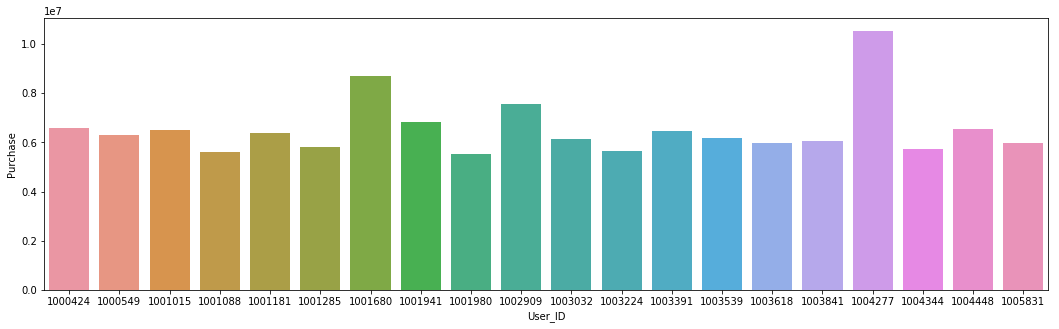

In [8]:
plt.figure(figsize=(18,5))
sns.barplot(y=ud['Purchase'],x=ud['User_ID'])

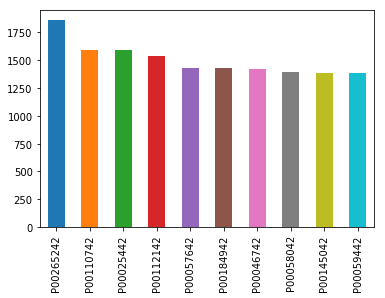

In [7]:
#Top 10 highest sold products
d['Product_ID'].value_counts().sort_values(ascending=False).head(10).plot('bar')

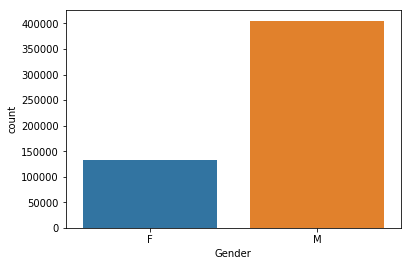

In [8]:
#Highest purchases are made by Male
#plt.figure(figsize=(14,5))
sns.countplot(d['Gender'])

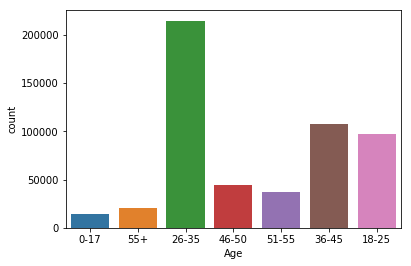

In [90]:
#people who have made most number of purchases falls under the age group 26-35
sns.countplot(d['Age'])

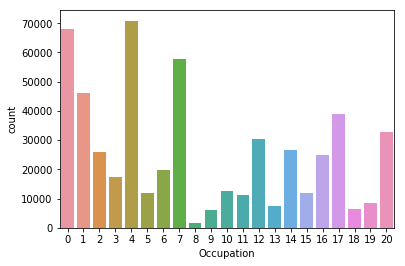

In [9]:
#People with Occupation 4 has made highest number of purchases
sns.countplot(x=d['Occupation'])

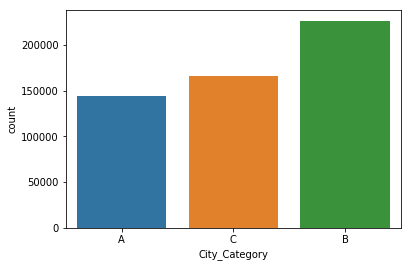

In [11]:
#Here it is evident that people belonging to City_Category B have made the highest purchases
sns.countplot(d['City_Category'])

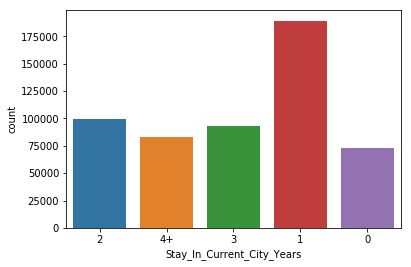

In [12]:
#From this plot it is evident that highest purchases are made by people living in the city from last 1 year
sns.countplot(x=d['Stay_In_Current_City_Years'])

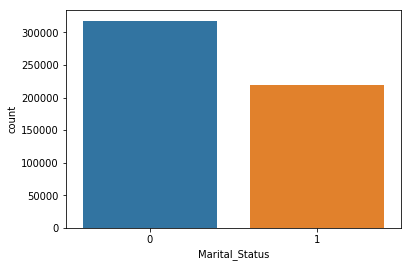

In [13]:
#Most of the purchases is made by people with matital_status 0.
sns.countplot(x=d['Marital_Status'])

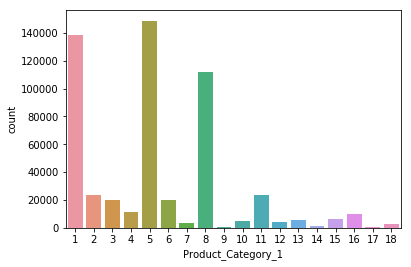

In [14]:
#Products belonging to category 5 are most the purchased products in Product_Category_1
sns.countplot(d['Product_Category_1'])

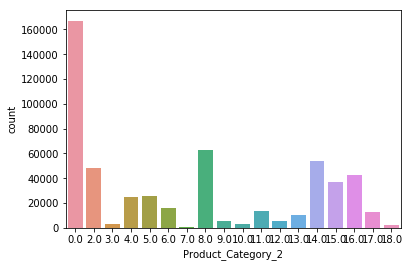

In [15]:
#From this plot, it is clear that Many products belonging Product_Category_2 are unsold
sns.countplot(d['Product_Category_2'])

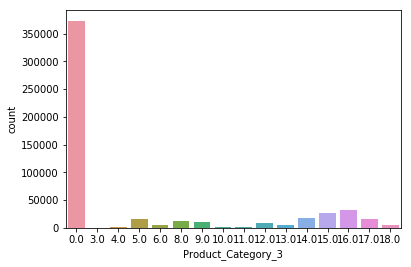

In [78]:
#Same for Product_Category_3. 
sns.countplot(d['Product_Category_3'])

# Data pre-processing

In [7]:
#Removing User_ID and User_ID from the dataset
d.drop(['User_ID','Product_ID'],inplace=True,axis=1)

In [8]:
#Converting variables with object type to numeric type
d['Gender']=d['Gender'].replace('F',0)
d['Gender']=d['Gender'].replace('M',1)

In [9]:
d['Age']=LabelEncoder().fit_transform(d['Age'])
d['City_Category']=LabelEncoder().fit_transform(d['City_Category'])

In [10]:
d['Stay_In_Current_City_Years']=d['Stay_In_Current_City_Years'].replace('4+',4)
d['Stay_In_Current_City_Years']=d['Stay_In_Current_City_Years'].astype('int64')

In [18]:
#After pre-processing, all the variables with object type are converted to numeric type. 
d.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0.0,0.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,0.0,0.0,1422
3,0,0,10,0,2,0,12,14.0,0.0,1057
4,1,6,16,2,4,0,8,0.0,0.0,7969
5,1,2,15,0,3,0,1,2.0,0.0,15227
6,1,4,7,1,2,1,1,8.0,17.0,19215
7,1,4,7,1,2,1,1,15.0,0.0,15854
8,1,4,7,1,2,1,1,16.0,0.0,15686
9,1,2,20,0,1,1,8,0.0,0.0,7871


In [84]:
d.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

(array([ 32175.,  57237., 130109., 104444.,  79179.,  24980.,  63928.,
         13437.,  29772.,   2316.]),
 array([  185. ,  2562.6,  4940.2,  7317.8,  9695.4, 12073. , 14450.6,
        16828.2, 19205.8, 21583.4, 23961. ]),
 <a list of 10 Patch objects>)

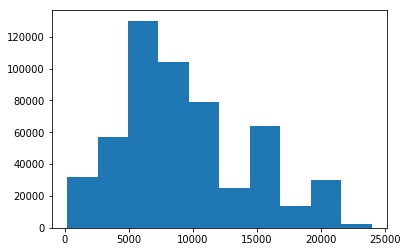

In [10]:
#Normality check for target variable
plt.hist(d['Purchase'])

In [11]:
#Splitting categorical variables
nd=d.loc[:,['Gender','Marital_Status']]
for i in ['Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Product_Category_1','Product_Category_2', 'Product_Category_3']:
    temp=pd.get_dummies(d[i],prefix=i)
    nd=nd.join(temp)

In [12]:
nd=nd.join(d['Purchase'])
nd.head()

,Gender,Marital_Status,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Occupation_0,...,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Purchase
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8370
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,15200
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1422
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1057
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7969


# Modeling

In [13]:
#Dividing the data to train and test
from sklearn.cross_validation import train_test_split
test,train=train_test_split(nd,test_size=0.8)
test.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(107515, 91)

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,:90],train.iloc[:,90])
dt_p=dt.predict(test.iloc[:,:90]).round()

In [15]:
#Function to calculate Mean Absolute Percentage Error
def mape(x,y):
    return np.mean(np.abs((x-y)/x))*100

In [22]:
#Calculating mae and mape
print('MAE:',mean_absolute_error(test['Purchase'],dt_p))
print('MAPE:',mape(test['Purchase'],dt_p))

MAE: 2971.8070687811005
MAPE: 59.90130275549001


# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
#rf=RandomForestRegressor(n_estimators=100).fit(train.iloc[:,:90],train.iloc[:,90])

#Predicting values
rf_p=rf.predict(test.iloc[:,:90]).round()

#Calculating mae and mape
print('MAE:',mean_absolute_error(test['Purchase'],rf_p))
print('MAPE:',mape(test['Purchase'],rf_p))

MAE: 2227.9091382597776
MAPE: 32.73067982347908


# Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=100).fit(train.iloc[:,:90],train.iloc[:,90])

#Predicting values
gb_p=gb.predict(test.iloc[:,:90])

#Calculating mae and mape
print('MAE:',mean_absolute_error(test['Purchase'],gb_p))
print('MAPE:',mape(test['Purchase'],gb_p))

MAE: 2307.4862077055122
MAPE: 36.92634641668203


# XGBoost

In [20]:
from xgboost import XGBRegressor
xg=XGBRegressor(n_estimators=100).fit(train.iloc[:,:90],train.iloc[:,90])

#Predicting values
xg_p=xg.predict(test.iloc[:,:90])

#Calculating mae and mape
print('MAE:',mean_absolute_error(test['Purchase'],xg_p))
print('MAPE:',mape(test['Purchase'],xg_p))

MAE: 2306.126277205279
MAPE: 36.89678907394409


# Linear regression

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(train.iloc[:,:90],train.iloc[:,90])

#Predicting values
lr_p=lr.predict(test.iloc[:,:90])

#Calculating mae and mape
print('MAE:',mean_absolute_error(test['Purchase'],lr_p))
print('MAPE:',mape(test['Purchase'],lr_p))

MAE: 2270.370727340371
MAPE: 34.69131312756748


From the above models it is clear that random forest has the lowest mean absolute percentage error value.
Random forest performs better for this dataset.